# Predict the percentage of an student based on the no. of study hours.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("student.csv",sep=(","))
df

,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0
5,1.5,20.0
6,9.2,88.0
7,5.5,60.0
8,8.3,81.0
9,2.7,25.0


In [6]:
df.isnull().sum()

Hours     3
Scores    3
dtype: int64

In [14]:
df.drop(df.tail(3).index,inplace=True)

In [43]:
df

,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0
5,1.5,20.0
6,9.2,88.0
7,5.5,60.0
8,8.3,81.0
9,2.7,25.0


In [44]:
X=df.drop(["Scores"],axis=1)
y=df['Scores']

In [45]:
y.shape

(16,)

In [46]:
X.shape

(16, 1)

In [47]:
from sklearn.model_selection import train_test_split

In [163]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

In [164]:
X_train.shape

(9, 1)

In [165]:
X_test.shape

(7, 1)

In [166]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [167]:
lr.intercept_

-4.400269433385624

In [168]:
lr.coef_

array([10.53263361])

In [169]:
pred=lr.predict(X_test)
pred

array([21.93131459, 49.31616198, 11.39868098,  7.18562754, 30.35742148,
       57.74226887, 83.02058954])

In [170]:
y_test

0     21.0
1     47.0
5     20.0
14    17.0
13    42.0
11    62.0
8     81.0
Name: Scores, dtype: float64

In [171]:
lr.score(X_test,y_test)*100

90.43146598448067

In [172]:
df_new=pd.DataFrame(np.c_[X_test,y_test,pred],columns=['Study hrs','Marks Original','Marks Predicted'])

In [173]:
df_new

,Study hrs,Marks Original,Marks Predicted
0,2.5,21.0,21.931315
1,5.1,47.0,49.316162
2,1.5,20.0,11.398681
3,1.1,17.0,7.185628
4,3.3,42.0,30.357421
5,5.9,62.0,57.742269
6,8.3,81.0,83.020590


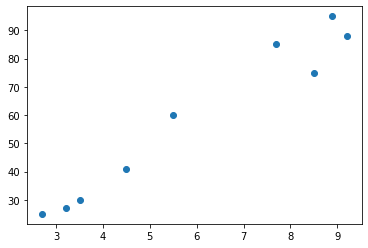

In [174]:
plt.scatter(X_train,y_train)

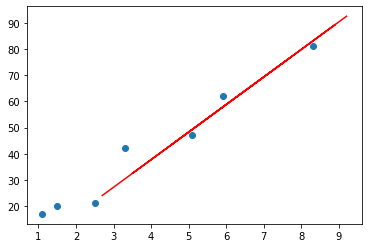

In [175]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color='r')